## Read Facebook

In [25]:
from tools.to_read import *
from tools.to_plot import *
from tools.to_do import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.image as mpimg
from tqdm import tqdm
import os

platform='twitter'
root = '/home/jacoponudo/Documents/Size_effects/' 
data = pd.read_parquet(root + 'DATA/' + platform + '/' + platform + '_raw_data.parquet', columns=columns_to_read[platform])
data.columns = standard_columns

In [24]:
data['user_id'].value_counts()

user_id
gandalfgrey@infectedmail.com                                      68918
 usenet@mantra.com and/or www.mantra.com/jai (Dr. Jai Maharaj)    56042
 rfischer@sonic.net (Ray Fischer)                                 46991
bustyourface@rocketmail.com                                       36976
ThenDestroyEverything@blackhole.nebulax.com                       35819
                                                                  ...  
 earlturner88@yahoo.com                                               1
 KenSicko@zhid.oz.org                                                 1
 kravmaga99@aol.com (KravMaga99)                                      1
whoever.uses.this.email.for.spam.is@an.idiot.bye                      1
 travis1@utxvms.cc.utexas.edu (trav)                                  1
Name: count, Length: 590506, dtype: int64

## Read Twitter

In [117]:
from tools.to_read import *
from tools.to_plot import *
from tools.to_do import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.image as mpimg
platform='twitter'
root = '/home/jacoponudo/Documents/Size_effects/' 
data = pd.read_parquet(root + 'DATA/' + platform + '/' + platform + '_raw_data.parquet')
data.rename(columns={
    'topic': 'page_id',
    'author_id': 'user_id',  # This remains the same
    'post_id': 'post_id',  # This remains the same
    'created_at': 'timestamp'
}, inplace=True)

## Read Reddit

In [4]:
import pandas as pd

root = '/home/jacoponudo/Documents/Size_effects/'
platform='reddit'
df = pd.read_parquet(root + 'DATA/' + platform + '/' + platform + '_raw_data.parquet',columns=['topic','user_id','post_id','date'])

df.rename(columns={
    'topic': 'page_id',
    'user_id': 'user_id',  # This remains the same
    'post_id': 'post_id',  # This remains the same
    'date': 'timestamp'
}, inplace=True)
data=df
data

,page_id,user_id,post_id,timestamp
0,climatechange,t2_6l4z3,7ndth3,2018-01-01 06:49:06+00:00
1,climatechange,t2_wiu0,7ne93z,2018-01-01 09:59:09+00:00
2,climatechange,t2_mwmugwc,7nf0fb,2018-01-01 12:54:33+00:00
3,climatechange,t2_eq6o6,7ne93z,2018-01-01 13:58:32+00:00
4,climatechange,t2_51cb9,7ne93z,2018-01-01 14:41:15+00:00
...,...,...,...,...
1853618,vaccines,t2_cu1l3alr,o5l0n8,2022-11-02 04:24:47+00:00
1853619,vaccines,t2_6l4z3,o5l0n8,2022-11-06 03:12:37+00:00
1853620,vaccines,t2_qsub24zn,o5l0n8,2022-11-06 03:17:14+00:00
1853621,vaccines,t2_2bbv0vl9,o5l0n8,2022-11-06 15:03:29+00:00


## Read Voat

In [41]:
from tools.to_read import *
from tools.to_plot import *
from tools.to_do import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.image as mpimg
root = '/home/jacoponudo/Documents/Size_effects/'
platform='voat'
df = pd.read_parquet(root + 'DATA/' + platform + '/' + platform + '_raw_data.parquet',columns=['topic','user','root_submission','created_at'])

df.rename(columns={
    'topic': 'page_id',
    'user': 'user_id',  # This remains the same
    'root_submission': 'post_id',  # This remains the same
    'created_at': 'timestamp'
}, inplace=True)
data=df

## Processing

In [2]:
df=data
# Assicurati che la colonna 'timestamp' sia di tipo datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Aggiungi una colonna 'week' che rappresenta la settimana dell'anno
df['week'] = df['timestamp'].dt.to_period('d')


# Raggruppa per 'page_id', 'week' e calcola il numero di utenti univoci per ogni combinazione
weekly_unique_users = df.groupby(['page_id', 'week'])['user_id'].nunique().reset_index()



# Rinominare la colonna per maggiore chiarezza
weekly_unique_users.rename(columns={'user_id': 'unique_users_count'}, inplace=True)

# Ordinare per 'page_id' e 'week' (assicurarsi che i dati siano in ordine)
weekly_unique_users = weekly_unique_users.sort_values(by=['page_id', 'week'])

# Aggiungere la media mobile a 3 settimane (o a una finestra che preferisci)
weekly_unique_users['smoothed_users_count'] = weekly_unique_users.groupby('page_id')['unique_users_count'].rolling(window=14, min_periods=1).mean().reset_index(level=0, drop=True)

# Mostrare i primi risultati
print(weekly_unique_users.head())

weekly_unique_users.to_csv("/home/jacoponudo/Documents/Size_effects/PAPER/output/4_section/ts_outreach.csv", index=False)

/tmp/ipykernel_8666/10713812.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df['timestamp'].dt.to_period('d')


         page_id        week  unique_users_count  smoothed_users_count
0  climatechange  2018-01-01                  68             68.000000
1  climatechange  2018-01-02                  76             72.000000
2  climatechange  2018-01-03                 143             95.666667
3  climatechange  2018-01-04                  48             83.750000
4  climatechange  2018-01-05                  87             84.400000


## Verbosity - Method 1

In [5]:


from tools.to_do import *

# Raggruppiamo per 'post_id' e 'page_id' e otteniamo il timestamp minimo per ogni gruppo
posts = data.groupby(['post_id', 'page_id'])['timestamp'].min().reset_index()

# Convertiamo 'timestamp' in formato datetime
posts['timestamp'] = pd.to_datetime(posts['timestamp'])

# Creiamo una colonna 'week' che rappresenta la settimana del 'timestamp'
posts['week'] = posts['timestamp'].dt.to_period('d')

# Raggruppiamo per 'user_id' e 'post_id' per calcolare il numero di commenti per ogni post
comments = data.groupby(['user_id', 'post_id']).size().reset_index(name='comment_count')

# Impostiamo un limite per i commenti (se ci sono più di 5 commenti, li limitamo a 5)
comments['comment_count'] = comments['comment_count'].apply(lambda x: 5 if x > 5 else x)

# Calcoliamo la distribuzione di probabilità dei commenti per ogni post
prob_dist = comments.groupby(['post_id'])['comment_count'].value_counts(normalize=True)

# Calcoliamo il parametro di localizzazione per ogni post_id
localization_results = prob_dist.groupby(['post_id']).apply(lambda x: calculate_localization_parameter(x.values)).reset_index(name='localization_parameter')

# Aggiungiamo la colonna 'localization_parameter' al DataFrame 'posts' tramite un merge su 'post_id'
posts = posts.merge(localization_results[['post_id', 'localization_parameter']], on='post_id', how='left')

 


/tmp/ipykernel_25185/677518029.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  posts['week'] = posts['timestamp'].dt.to_period('d')


## Verbosity - Method 2

In [3]:


from tools.to_do import *

# Raggruppiamo per 'post_id' e 'page_id' e otteniamo il timestamp minimo per ogni gruppo
posts = data.groupby(['post_id', 'page_id'])['timestamp'].min().reset_index()

# Convertiamo 'timestamp' in formato datetime
posts['timestamp'] = pd.to_datetime(posts['timestamp'])

# Creiamo una colonna 'week' che rappresenta la settimana del 'timestamp'
posts['week'] = posts['timestamp'].dt.to_period('d')

# Raggruppiamo per 'user_id' e 'post_id' per calcolare il numero di commenti per ogni post
# Grouping by 'user_id' and 'post_id' to count the comments
# Sorting comments by user_id and post_id
data = data.sort_values(by=['user_id', 'post_id', 'timestamp'])

# Adding comment count for each user and post
data = data.merge(data.groupby(['user_id', 'post_id']).size().reset_index(name='comment_count')[['user_id', 'post_id', 'comment_count']], on=['user_id', 'post_id'], how='left')

# Marking the last comment for each user and post
data['is_last_comment'] = data.groupby(['user_id', 'post_id'])['timestamp'].transform('last') == data['timestamp']
posts = data.groupby(['page_id', 'post_id', 'week'])['is_last_comment'].mean().reset_index()
posts

/tmp/ipykernel_24770/2513271468.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  posts['week'] = posts['timestamp'].dt.to_period('d')


,page_id,post_id,week,is_last_comment
0,100117146754830,100117146754830_10151984068348816,2013-10-08,1.0
1,100117146754830,100117146754830_10152178712360119,2014-01-26,1.0
2,100117146754830,100117146754830_10152184986155119,2014-01-29,1.0
3,100117146754830,100117146754830_10152184986155119,2014-01-30,1.0
4,100117146754830,100117146754830_10152203828775119,2014-02-08,1.0
...,...,...,...,...
2026885,99609391511,99609391511_470719449617011,2012-09-18,1.0
2026886,99609391511,99609391511_500217570004449,2012-07-19,1.0
2026887,99609391511,99609391511_502928233052910,2012-10-05,1.0
2026888,99609391511,99609391511_633756979974402,2013-03-24,1.0


## Merge

In [43]:
merged_df = pd.merge(weekly_unique_users, posts, on=['page_id',  'week'], how='right')

# 'how' può essere 'inner', 'left', 'right' o 'outer' a seconda di come vuoi che vengano gestiti i valori non corrispondenti

# Mostriamo il risultato del merge
print(merged_df)
merged_df.to_csv(root + f'PAPER/output/4_section/5_size_effect_{platform}.csv')

             page_id        week  unique_users_count  smoothed_users_count  \
0            science  2018-01-01                 NaN                   NaN   
1         conspiracy  2018-01-01                 NaN                   NaN   
2         conspiracy  2018-01-01                 NaN                   NaN   
3         conspiracy  2018-01-01                 NaN                   NaN   
4         conspiracy  2018-01-01                 NaN                   NaN   
...              ...         ...                 ...                   ...   
80811  climatechange  2022-12-10                 NaN                   NaN   
80812  climatechange  2022-12-10                 NaN                   NaN   
80813  climatechange  2022-12-10                 NaN                   NaN   
80814  climatechange  2022-12-10                 NaN                   NaN   
80815  climatechange  2022-12-10                 NaN                   NaN   

      post_id                 timestamp  
0      7nbyni 2018-01

## Plot

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Creazione dei bins logaritmici
bin_start = 20
bin_end =1000

# Calcolare i limiti dei bins utilizzando logaritmi (log base 10)
bins = np.logspace(np.log10(bin_start), np.log10(bin_end), num=10)

# Aggiunta di una colonna per il bin in cui si trova ogni valore
merged_df['binned'] = pd.cut(merged_df['smoothed_users_count'], bins, right=False)

# Filtriamo i bins che hanno meno di 100 osservazioni
binned_counts = merged_df['binned'].value_counts()
valid_bins = binned_counts[binned_counts >= 100].index

# Ordiniamo i bins in base al limite sinistro
valid_bins = sorted(valid_bins, key=lambda bin_: bin_.left)

# Calcolo del valore medio di 'localization_parameter' per ogni bin valido
mean_values = [
    merged_df[merged_df['binned'] == bin_]['localization_parameter'].mean()
    for bin_ in valid_bins
]

# Creazione del line plot
plt.figure(figsize=(10, 6))

# Disegno del grafico a linee
plt.plot(np.arange(len(valid_bins)), mean_values, marker='o', linestyle='-',color=palette[platform])

# Etichette per i bins
bin_labels = [f'{int(bin_.left)} - {int(bin_.right)}' for bin_ in valid_bins]
plt.xticks(np.arange(len(valid_bins)), bin_labels, rotation=45)

# Aggiunta delle etichette agli assi
plt.xlabel('Page outreach', fontsize=30)
plt.ylabel('Localization', fontsize=30)
plt.title(str(platform.capitalize()), fontsize=35)
# Mostra il grafico
plt.tight_layout()
plt.savefig(f"{root}PAPER/output/4_section/5_size_effect_{platform}.png")
plt.show()


KeyError: 'localization_parameter'

: 

## Pages with change size

In [15]:
import pandas as pd

# Filtra il DataFrame per i page_id di interesse
merged_df = merged_df[merged_df['page_id'].isin(pages_with_size_change)]

# Crea 4 classi bilanciate per 'smoothed_users_count' usando qcut
merged_df['size'] = pd.qcut(merged_df['smoothed_users_count'], q=14)

# Visualizza il risultato
print(merged_df[['page_id', 'smoothed_users_count', 'size']].head())


           page_id  smoothed_users_count             size
4422  100183534537              2.576923  (0.999, 11.233]
4423  100183534537              2.576923  (0.999, 11.233]
4424  100183534537              2.547170  (0.999, 11.233]
4425  100183534537              2.518519  (0.999, 11.233]
4426  100183534537              2.509091  (0.999, 11.233]


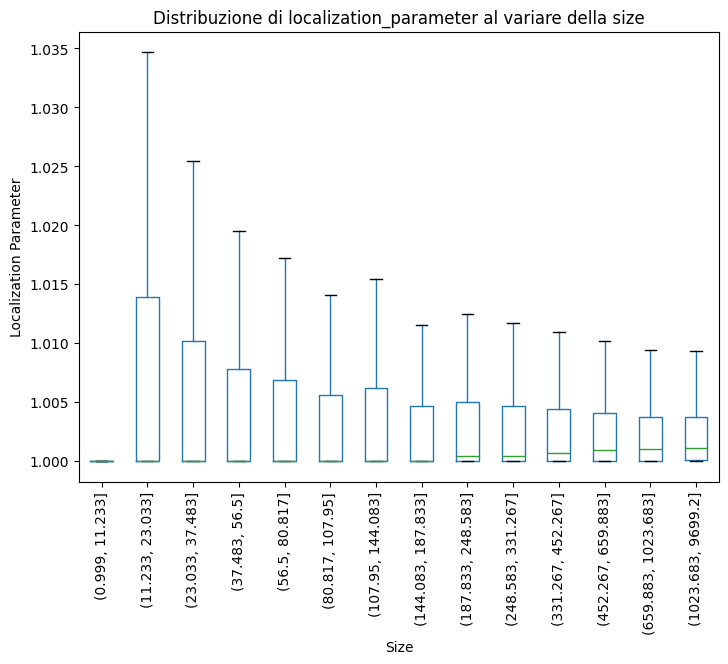

In [17]:
import matplotlib.pyplot as plt

# Creare due boxplot per la variabile 'localization_parameter' rispetto alla 'size'
fig, ax = plt.subplots(figsize=(8, 6))

# Crea i boxplot separati per le categorie di 'size'
merged_df.boxplot(column='localization_parameter', by='size', ax=ax, grid=False, showfliers=False)

# Personalizzazione del grafico
plt.title('Distribuzione di localization_parameter al variare della size')
plt.suptitle('')  # Rimuove il titolo automatico del groupby boxplot
plt.xlabel('Size')
plt.ylabel('Localization Parameter')

# Ridimensiona e ruota le etichette dell'asse x
plt.xticks(rotation=90, fontsize=10)  # Ruota di 90 gradi con dimensione del testo più piccola

plt.show()


## User behaviour
How the propension of the same user is influenced by the context.

In [3]:
from tools.to_do import *

# Raggruppiamo per 'post_id' e 'page_id' e otteniamo il timestamp minimo per ogni gruppo
posts = data.groupby(['post_id', 'page_id'])['timestamp'].min().reset_index()

# Convertiamo 'timestamp' in formato datetime
posts['timestamp'] = pd.to_datetime(posts['timestamp'])

# Creiamo una colonna 'week' che rappresenta la settimana del 'timestamp'
posts['week'] = posts['timestamp'].dt.to_period('d')

# Raggruppiamo per 'user_id' e 'post_id' per calcolare il numero di commenti per ogni post
comments = data.groupby(['user_id', 'post_id','week','page_id']).size().reset_index(name='comment_count')

# Impostiamo un limite per i commenti (se ci sono più di 5 commenti, li limitamo a 5)
comments['comment_count'] = comments['comment_count'].apply(lambda x: 10 if x > 10 else x)

/tmp/ipykernel_8666/4160589874.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  posts['week'] = posts['timestamp'].dt.to_period('d')


In [17]:

merged_df = pd.merge(weekly_unique_users, comments, on=['page_id',  'week'], how='right')

# Filtra le righe con unique_users_count uguale a 100 o 500
upper=2000
lower=1000
size_100 = merged_df[merged_df['unique_users_count'] < lower]['user_id'].unique()

size_500 = merged_df[merged_df['unique_users_count'] > upper]['user_id'].unique()

# Trova i page_id presenti in entrambe le condizioni
pages_with_size_change = set(size_100).intersection(set(size_500))

print(pages_with_size_change)
print(len(pages_with_size_change))


{'t2_115o5k', 't2_10sx85', 't2_6hmatqbm', 't2_b9jzg', 't2_1sc09gtt', 't2_hifny', 't2_8zxtn', 't2_1g0xcxu5', 't2_6y8qx', 't2_pia6v', 't2_7ypnk7wv', 't2_n3hc7', 't2_1sn1na0', 't2_wy50a', 't2_jcgqd', 't2_6343zlul', 't2_wnbp5', 't2_aje4nu1k', 't2_fl5p9', 't2_sagw4', 't2_1i973zxx', 't2_16l8ks', 't2_1kxujr6m', 't2_81g67', 't2_js5wr', 't2_x3zm3', 't2_86773rgn', 't2_fgi40', 't2_82dfw', 't2_hm82l', 't2_t5916', 't2_a1mbyysz', 't2_mtxld', 't2_6lkzf', 't2_n1und', 't2_15ghe2', 't2_3y4km', 't2_f7vws', 't2_9thr2', 't2_2gpzgo5w', 't2_fr20i', 't2_5608rbmg', 't2_ziuud', 't2_a1asf8x4', 't2_onyqv', 't2_1j1bz5bx', 't2_4aa2i', 't2_bmnie', 't2_1jzd7zr', 't2_3e4uj', 't2_b8xom', 't2_3ufpiyik', 't2_pyw47', 't2_44txb', 't2_pzj7k', 't2_8ud6q', 't2_11ngl6ed', 't2_631admpw', 't2_2uxjebyl', 't2_4dl48', 't2_cimta259', 't2_17dcwc', 't2_ospp1', 't2_alwdp', 't2_118nzl', 't2_b79mebhl', 't2_eg4hr', 't2_d7sse', 't2_5ll4o95u', 't2_920dky4', 't2_2j0kda6t', 't2_a2wh289d', 't2_ctcx7s7k', 't2_4rp1z', 't2_eq229', 't2_6424j', 't2

In [18]:
import pandas as pd
import random
from tqdm import tqdm

# Numero di utenti da campionare
sample_size = 1000

# Seleziona un campione casuale di 1000 utenti
sampled_users = random.sample(pages_with_size_change, sample_size)

# DataFrame vuoto per memorizzare i risultati finali
selected_rows = []

# Itera sugli utenti nel campione
for user in tqdm(sampled_users):
    # Filtra le righe per l'utente
    user_df = merged_df[merged_df['user_id'] == user]

    # Separa le righe con size maggiore di 500 e con size minore di 100
    size_greater_500 = user_df[user_df['unique_users_count'] > upper]
    size_less_100 = user_df[user_df['unique_users_count'] < lower]

    # Trova il numero minimo di righe tra le due categorie
    min_rows = min(len(size_greater_500), len(size_less_100))

    # Seleziona il numero minimo di righe da entrambe le categorie
    selected_greater_500 = size_greater_500.head(min_rows)
    selected_less_100 = size_less_100.head(min_rows)

    # Unisci le righe selezionate
    selected_user_rows = pd.concat([selected_greater_500, selected_less_100])

    # Aggiungi le righe selezionate al DataFrame finale
    selected_rows.append(selected_user_rows)

# Combina tutte le righe selezionate in un unico DataFrame
final_df = pd.concat(selected_rows, ignore_index=True)


/tmp/ipykernel_8666/3161367365.py:9: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_users = random.sample(pages_with_size_change, sample_size)
100%|██████████| 1000/1000 [01:04<00:00, 15.53it/s]


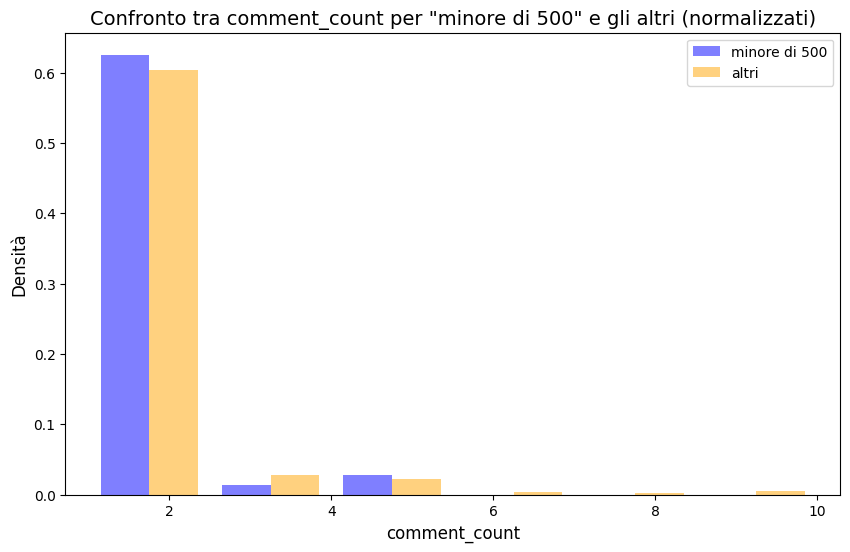

Osservato diff in media: -0.17186206896551726
P-value del test di permutazione: 0.0948
Le distribuzioni non sono significativamente diverse.
Media 'minore di 500': 1.289655172413793, Media 'altri': 1.4615172413793103
Mediana 'minore di 500': 1.0, Mediana 'altri': 1.0
'altri' ha una media maggiore.


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Creazione delle distribuzioni come da codice iniziale
final_df['size'] = final_df['unique_users_count'].apply(lambda x: 'maggiore di 500' if x > 200 else 'minore di 500')

data_minore_500 = final_df[final_df['size'] == 'minore di 500']['comment_count']
data_altri = final_df[final_df['size'] != 'minore di 500']['comment_count']

# Funzione per calcolare la differenza di media tra due campioni
def calculate_diff_mean(data1, data2):
    return np.mean(data1) - np.mean(data2)

# Test di permutazione
np.random.seed(42)
observed_diff = calculate_diff_mean(data_minore_500, data_altri)
combined_data = np.concatenate([data_minore_500, data_altri])

n_permutations = 10000
permuted_diffs = []

for _ in range(n_permutations):
    np.random.shuffle(combined_data)
    permuted_data_1 = combined_data[:len(data_minore_500)]
    permuted_data_2 = combined_data[len(data_minore_500):]
    permuted_diff = calculate_diff_mean(permuted_data_1, permuted_data_2)
    permuted_diffs.append(permuted_diff)

# Calcolare il p-value
permuted_diffs = np.array(permuted_diffs)
p_value_perm = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))

# Creazione dell'istogramma relativo (normalizzato)
plt.figure(figsize=(10, 6))
plt.hist([data_minore_500, data_altri], bins=6, label=['minore di 500', 'altri'], alpha=0.5, color=['blue', 'orange'], density=True)

# Etichette
plt.title('Confronto tra comment_count per "minore di 500" e gli altri (normalizzati)', fontsize=14)
plt.xlabel('comment_count', fontsize=12)
plt.ylabel('Densità', fontsize=12)

# Legenda
plt.legend()

# Mostra il grafico
plt.show()

# Risultati
print(f"Osservato diff in media: {observed_diff}")
print(f"P-value del test di permutazione: {p_value_perm}")
if p_value_perm < 0.05:
    print("Le distribuzioni sono significativamente diverse.")
else:
    print("Le distribuzioni non sono significativamente diverse.")

# Confronto delle medie e mediane
media_minore_500 = data_minore_500.mean()
media_altri = data_altri.mean()

mediana_minore_500 = data_minore_500.median()
mediana_altri = data_altri.median()

print(f"Media 'minore di 500': {media_minore_500}, Media 'altri': {media_altri}")
print(f"Mediana 'minore di 500': {mediana_minore_500}, Mediana 'altri': {mediana_altri}")

if media_minore_500 > media_altri:
    print("'minore di 500' ha una media maggiore.")
else:
    print("'altri' ha una media maggiore.")


# Age effect
Quanto il livello di attività su una pagina fino a quel momento influenza la propensione a parlare 




In [64]:
from tools.to_read import *
from tools.to_plot import *
from tools.to_do import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.image as mpimg

platform='gab'
root = '/home/jacoponudo/Documents/Size_effects/'
data = read_and_rename(platform, root)
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [65]:
# Prendi solo i primi 10 utenti (unici)
unique_users = data['user_id'].drop_duplicates().head(1000)

# Filtra i dati per mantenere solo quelli relativi a questi utenti
data = data[data['user_id'].isin(unique_users)]

In [66]:
# Ordinare i dati
data = data.sort_values(by=['page_id', 'user_id', 'timestamp'])
data['interaction_len'] = data.groupby(['post_id', 'user_id'])['post_id'].transform('size')

data['posts_commented'] = 0

# Abilitare la barra di progresso per i gruppi di page_id e user_id
for (page, user), group in tqdm(data.groupby(['page_id', 'user_id']), desc="Processing users and pages"):
    post_count = 0
    previous_post_id = None  # Variabile per tracciare l'ID del post precedente
    
    # Aggiungere una barra di progresso per l'iterazione sulle righe del gruppo
    for i, row in tqdm(group.iterrows(), total=len(group), desc=f"User {user} on Page {page}", leave=False):
        # Incrementa il contatore se l'ID del post è diverso dal precedente
        if row['post_id'] != previous_post_id:
            post_count += 1
            previous_post_id = row['post_id']
        
        # Assegna il conteggio dei post commentati
        data.loc[row.name, 'posts_commented'] = post_count

# Filtro per mantenere solo gli utenti con almeno 20 commenti
data_filtered = data[data['user_id'].isin(data.groupby('user_id')['posts_commented'].max()[data.groupby('user_id')['posts_commented'].max() > 20].index)]

data_filtered = data_filtered[data_filtered['posts_commented'] <20]
# Visualizzare il risultato
print(data_filtered[['user_id','post_id','interaction_len','posts_commented']].drop_duplicates())


Processing users and pages: 100%|██████████| 1000/1000 [05:55<00:00,  2.81it/s]


        user_id   post_id  interaction_len  posts_commented
577813   100130   2229929                1                1
582408   100130   2230197                2                2
384035   100130   2440438                1                3
384050   100130   2401101                1                4
613501   100130   2465575                1                5
...         ...       ...              ...              ...
3827959   99841   9786745                1               15
4506564   99841  10004888                1               16
3530930   99841  10283507                1               17
3530948   99841  10269685                1               18
3530958   99841  10264239                1               19

[16758 rows x 4 columns]


In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Supponiamo che tu abbia già il DataFrame 'data' caricato

# Selezioniamo le colonne e rimuoviamo i duplicati
df_filtered = data_filtered[['user_id', 'post_id', 'interaction_len', 'posts_commented']].drop_duplicates()

# Un elenco di utenti unici
user_ids = df_filtered['user_id'].unique()

# Creiamo una lista per memorizzare i risultati
results = []

# Impostiamo il numero di righe e colonne per i subplot (puoi modificarlo in base al numero di utenti)
n_users = len(user_ids)


# Cicliamo su ciascun utente e tracciamo la regressione
for i, user_id in enumerate(user_ids):
    # Filtriamo i dati per l'utente corrente
    user_data = df_filtered[df_filtered['user_id'] == user_id]
    
    # Calcoliamo la regressione lineare per ottenere slope e intercept
    slope, intercept, r_value, p_value, std_err = linregress(user_data['posts_commented'], user_data['interaction_len'])
    
    # Salviamo i risultati in una lista
    results.append({'user_id': user_id, 'slope': slope, 'intercept': intercept})
    
    # Creiamo un subplot per ciascun utente
    #plt.subplot(n_rows, n_cols, i + 1)
    #sns.regplot(x='posts_commented', y='interaction_len', data=user_data, scatter_kws={'s': 50}, line_kws={'color': 'red'})
    
    # Aggiungiamo il titolo e le etichette
    #plt.title(f'Utenza {user_id}')
    #plt.xlabel('Numero di Post Commentati')
    #plt.ylabel('Lunghezza dell\'Interazione')

# Aggiungiamo una spaziatura tra i grafici
#plt.tight_layout()

# Mostriamo i grafici
#plt.show()

# Creiamo un DataFrame con i risultati
results_df = pd.DataFrame(results)

# Visualizziamo la tabella con i risultati
print(results_df)


    user_id     slope  intercept
0    100130  0.001754   1.087719
1     10039  0.012281   1.403509
2    100406 -0.010526   1.210526
3    100522 -0.263158   5.052632
4    100714  0.001754   1.087719
..      ...       ...        ...
877   99194  0.000000   1.000000
878   99553 -0.022807   1.333333
879   99760 -0.014035   1.192982
880   99763  0.010526   0.947368
881   99841 -0.012281   1.175439

[882 rows x 3 columns]


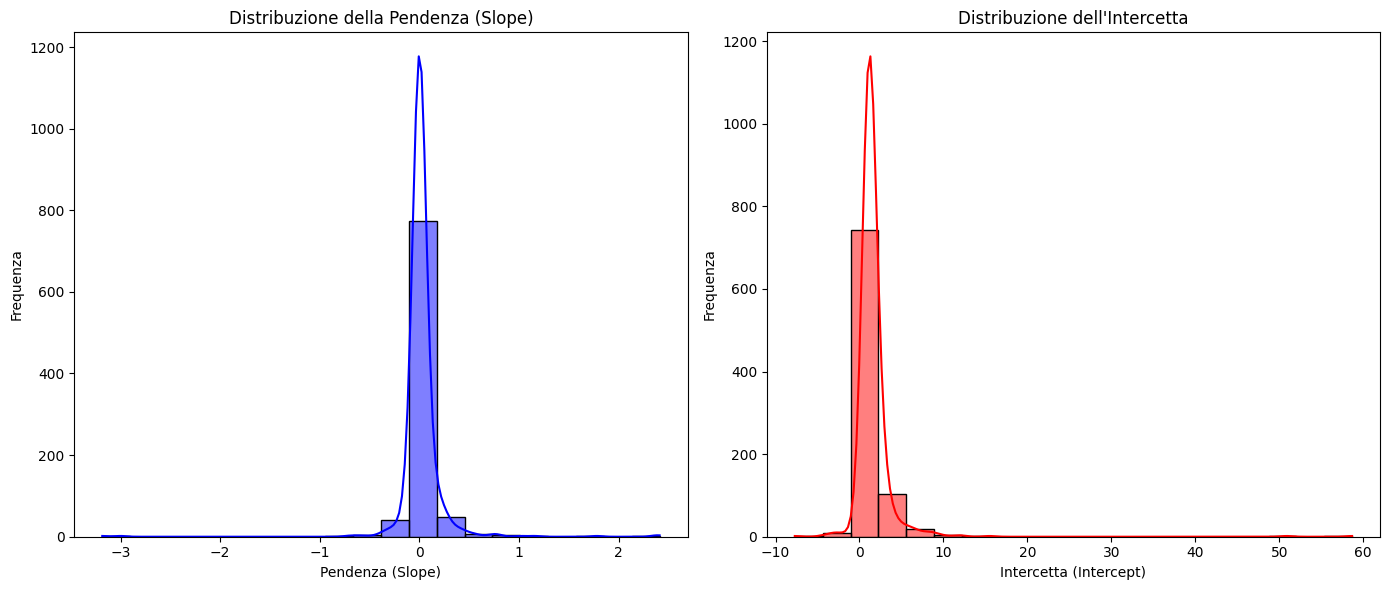

In [68]:

# Un elenco di utenti unici
user_ids = data_filtered['user_id'].unique()

# Creiamo una lista per memorizzare i risultati della regressione
slopes = []
intercepts = []

# Cicliamo su ciascun utente per calcolare la regressione
for user_id in user_ids:
    # Filtriamo i dati per l'utente corrente
    user_data = data_filtered[data_filtered['user_id'] == user_id]
    
    # Calcoliamo la regressione lineare per ottenere slope e intercept
    slope, intercept, r_value, p_value, std_err = linregress(user_data['posts_commented'], user_data['interaction_len'])
    
    # Aggiungiamo i risultati alla lista
    slopes.append(slope)
    intercepts.append(intercept)

# Creiamo due istogrammi per visualizzare le distribuzioni delle pendenze e degli intercetti
plt.figure(figsize=(14, 6))

# Istogramma della pendenza
plt.subplot(1, 2, 1)
sns.histplot(slopes, kde=True, bins=20, color='blue')
plt.title('Distribuzione della Pendenza (Slope)')
plt.xlabel('Pendenza (Slope)')
plt.ylabel('Frequenza')

# Istogramma dell'intercetta
plt.subplot(1, 2, 2)
sns.histplot(intercepts, kde=True, bins=20, color='red')
plt.title('Distribuzione dell\'Intercetta')
plt.xlabel('Intercetta (Intercept)')
plt.ylabel('Frequenza')

# Mostriamo gli istogrammi
plt.tight_layout()
plt.show()

In [38]:
weekly_unique_users

,page_id,week,unique_users_count,smoothed_users_count
0,climatechange,2018-01-01/2018-01-07,444,444.000000
1,climatechange,2018-01-08/2018-01-14,53,248.500000
2,climatechange,2018-01-15/2018-01-21,423,306.666667
3,climatechange,2018-01-22/2018-01-28,114,258.500000
4,climatechange,2018-01-29/2018-02-04,319,270.600000
...,...,...,...,...
778,vaccines,2022-09-19/2022-09-25,1,1.750000
779,vaccines,2022-09-26/2022-10-02,2,1.833333
780,vaccines,2022-10-03/2022-10-09,1,1.500000
781,vaccines,2022-10-24/2022-10-30,1,1.416667


In [42]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm
from tools.to_read import *
from tools.to_do import *
from tools.to_plot import *

# Define root path for saving results
root = '/home/jacoponudo/Documents/Size_effects/'

# Platform types and index categories
platforms = ['reddit']
types = ['_localization', '_alpha']

# Parameters for data filtering and processing
ignore_under = 50  # Minimum outreach threshold to avoid U-shaped trends
group_size = 1000  # Number of interactions per bin
time_window = 12  # Time window for smoothing the time series (weeks)
correction = 5  # Maximum value of interaction count for corrections


for type in types:
    for platform in tqdm(platforms):
        output_path = f'{root}PAPER/output/4_section/5_size_effect_{platform}{type}.csv'
        
        # If the output file does not exist, process and generate data
        if not os.path.exists(output_path):
            # Load and preprocess data for the platform
            df = read_and_rename(platform, root)
            df['timestamp'] = pd.to_datetime(df['timestamp'])  # Convert timestamp to datetime
            df['week'] = df['timestamp'].dt.to_period('W')  # Extract the week from timestamp

            # Group by 'page_id' and 'week' to count unique users
            weekly_unique_users = df.groupby(['page_id', 'week'])['user_id'].nunique().reset_index()
            weekly_unique_users.rename(columns={'user_id': 'unique_users_count'}, inplace=True)
            weekly_unique_users = weekly_unique_users.sort_values(by=['page_id', 'week'])
            
            # Apply a moving average for smoothing
            weekly_unique_users['smoothed_users_count'] = (
                weekly_unique_users.groupby('page_id')['unique_users_count']
                .rolling(window=time_window, min_periods=1)
                .mean().reset_index(level=0, drop=True)
            )

            # Filter out entries with outreach lower than the threshold
            weekly_unique_users = weekly_unique_users[weekly_unique_users['unique_users_count'] > ignore_under]

            # Divide the data into bins with the same number of observations
            # This ensures that each bin has the same number of records
            num_bins = weekly_unique_users['unique_users_count'].sum() // group_size
            weekly_unique_users['binned'] = pd.qcut(weekly_unique_users['smoothed_users_count'], 
                                                     q=num_bins, 
                                                     labels=False, 
                                                     duplicates='drop')

            # Group by 'user_id', 'post_id', 'page_id' and calculate interaction counts
            interactions = df.groupby(['user_id', 'post_id', 'page_id'])['timestamp'].agg(['min', 'count']).reset_index()
            interactions['timestamp'] = pd.to_datetime(interactions['min'])
            interactions['week'] = interactions['timestamp'].dt.to_period('W')

            # Apply correction for interaction counts
            interactions['count'] = interactions['count'].apply(lambda x: min(x, correction))

            # Merge interactions with weekly unique users data
            interactions = interactions.merge(weekly_unique_users[['page_id', 'week', 'binned', 'smoothed_users_count']], 
                                              on=['page_id', 'week'])

            # Calculate the probability distribution of comment counts for each post
            prob_dist = interactions.groupby(['binned'])['count'].value_counts(normalize=True)

            # Calculate localization or alpha parameter
            if type == '_alpha':
                localization_results = prob_dist.groupby(['binned']).apply(lambda x: calculate_alpha_parameter(x.values)).reset_index(name='localization_parameter')
            else:
                localization_results = prob_dist.groupby(['binned']).apply(lambda x: calculate_localization_parameter(x.values)).reset_index(name='localization_parameter')

            # Save the results to CSV
            localization_results.to_csv(output_path)


  0%|          | 0/1 [00:00<?, ?it/s]/tmp/ipykernel_38983/3160466473.py:34: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df['timestamp'].dt.to_period('W')  # Extract the week from timestamp
/tmp/ipykernel_38983/3160466473.py:62: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  interactions['week'] = interactions['timestamp'].dt.to_period('W')
  0%|          | 0/1 [00:00<?, ?it/s]/tmp/ipykernel_38983/3160466473.py:34: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df['timestamp'].dt.to_period('W')  # Extract the week from timestamp
/tmp/ipykernel_38983/3160466473.py:62: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  interactions['week'] = interactions['timestamp'].dt.to_period('W')
100%|██████████| 1/1 [00:02<00:00,  2.07s/it]


In [43]:
localization_results

,binned,localization_parameter
0,0,NaN
1,1,0.604762
2,3,NaN
3,5,0.596154
4,6,0.602410
...,...,...
505,865,0.758644
506,866,NaN
507,868,0.746536
508,870,NaN


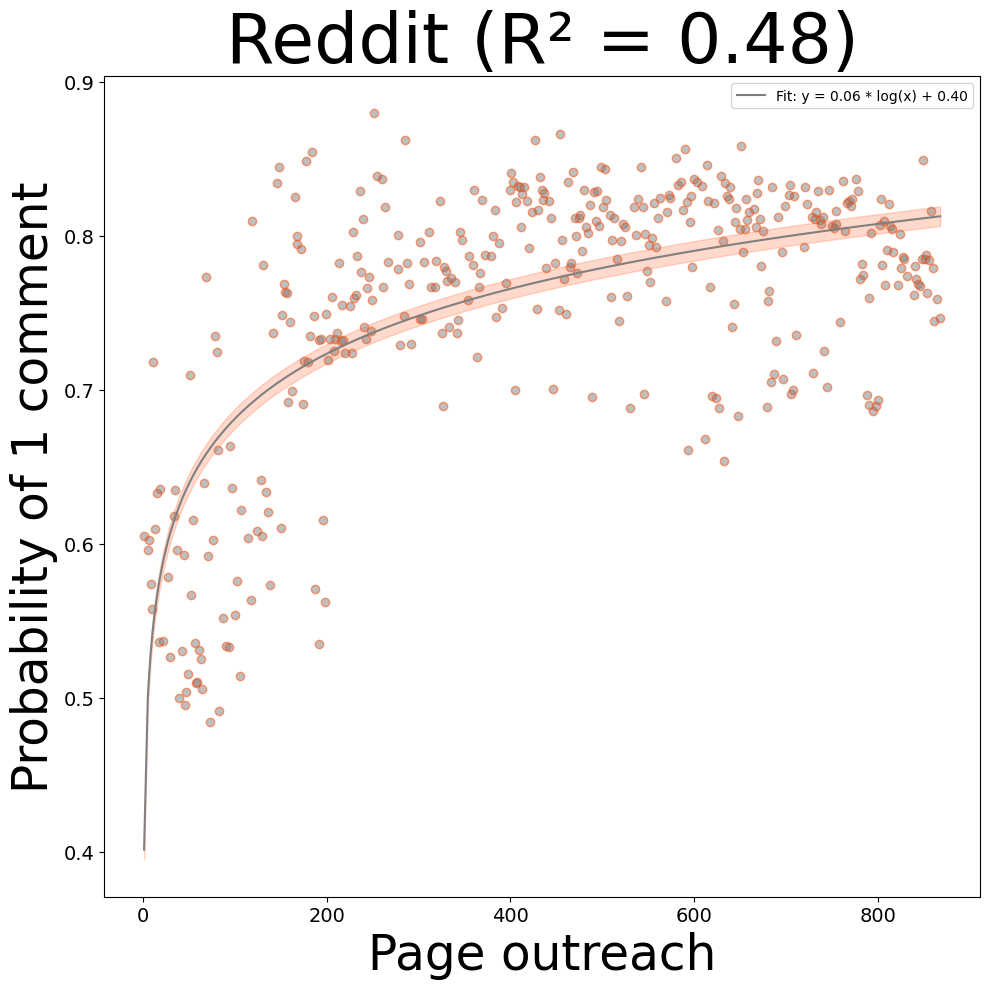

In [45]:
merged_df = pd.read_csv(root + f'PAPER/output/4_section/5_size_effect_{platform+type}.csv')


color ='grey'# palette[platform]

# Estrai e arrotonda la colonna 'binned_lower'
merged_df['binned_lower'] = merged_df['binned']

# Filtra righe con valori NaN o Inf
merged_df = merged_df.dropna(subset=['binned_lower', 'localization_parameter'])
merged_df = merged_df[np.isfinite(merged_df['localization_parameter'])]

# Dati per l'interpolazione
x = merged_df['binned_lower']
y = merged_df['localization_parameter']

# Assicurati che x e y siano numerici
x = pd.to_numeric(x, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Rimuovi righe non valide
valid_idx = (~x.isna()) & (x > 0) & (~y.isna())
x = x[valid_idx]
y = y[valid_idx]

# Applica logaritmo a x
log_x = np.log(x)

# Stima la retta di regressione tra y e log(x)
slope, intercept, r_value, p_value, std_err = stats.linregress(log_x, y)

# Calcola R^2
r2 = r_value ** 2

# Calcola l'intervallo di confidenza al 95% per la pendenza (slope) e l'intercetta (intercept)
n = len(x)  # numero di dati validi
t_value = stats.t.ppf(0.975, df=n-2)  # valore t per il 95% di intervallo di confidenza
slope_ci = t_value * std_err  # intervallo di confidenza per la pendenza
intercept_ci = t_value * std_err  # intervallo di confidenza per l'intercetta

# Creazione del grafico
plt.figure(figsize=(d1, d2))

# Punti originali
plt.scatter(x, y, color=color, zorder=5, alpha=0.5, edgecolors=palette[platform])

# Aggiungi la retta di regressione
plt.plot(x, slope * log_x + intercept, color='grey', label=f'Fit: y = {slope:.2f} * log(x) + {intercept:.2f}', zorder=10)

# Aggiungi le bande di confidenza per la pendenza e l'intercetta
plt.fill_between(x, slope * log_x + intercept - slope_ci, slope * log_x + intercept + slope_ci, color=palette[platform], alpha=0.2)

plt.xlabel('Page outreach', fontsize=xl)
if type == '_alpha':
    plt.ylabel('Probability of 1 comment', fontsize=xl)
else:
    plt.ylabel('Localization', fontsize=xl)
plt.title(f'{platform.capitalize()} (R² = {r2:.2f})', fontsize=T)  # Include R² in the title
plt.tick_params(axis='both', which='major', labelsize=t)

plt.legend()
plt.tight_layout()
#plt.xscale('log')

plt.savefig(f"{root}PAPER/output/4_section/5_size_effect_{platform+type}.png")
plt.show()

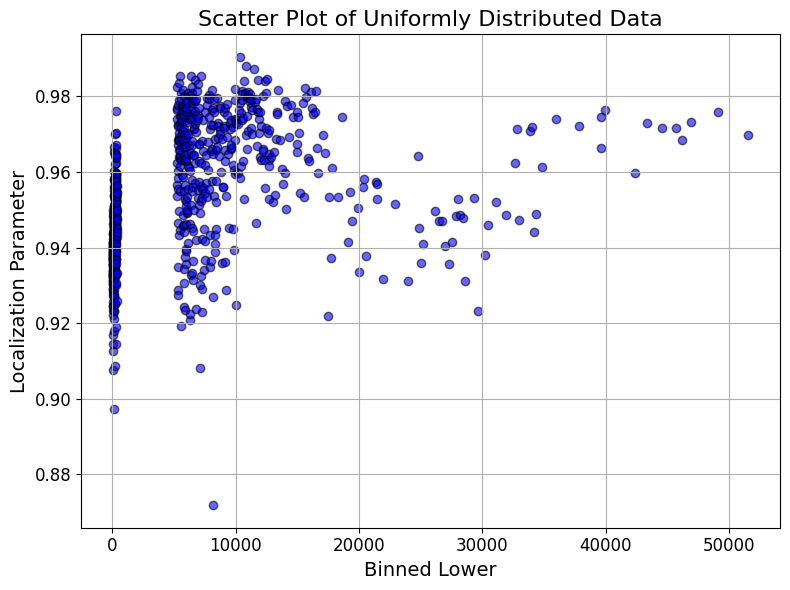

In [9]:
import matplotlib.pyplot as plt

# Crea il grafico a dispersione (scatter plot)
plt.figure(figsize=(8, 6))

# Grafico a dispersione dei dati uniformati
plt.scatter(x_uniform, y_uniform, color='blue', alpha=0.6, edgecolors='black')

# Etichette e titolo del grafico
plt.xlabel('Binned Lower', fontsize=14)
plt.ylabel('Localization Parameter', fontsize=14)
plt.title('Scatter Plot of Uniformly Distributed Data', fontsize=16)

# Impostazioni dei tick
plt.tick_params(axis='both', which='major', labelsize=12)

# Aggiungi una griglia
plt.grid(True)

# Mostra il grafico
plt.tight_layout()
plt.show()
